In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path='/content/drive/MyDrive/animal'
class_names = sorted(os.listdir(data_path))

In [ ]:
num_classes = len(class_names)

# Print the class names and the total number of classes
print("Class Names: \n", class_names)
print("Number of Classes:", num_classes)

Class Names: 
 ['cane', 'cavallo_1', 'ele']
Number of Classes: 3


In [ ]:
class_sizes = []
for name in class_names:
    class_size = len(os.listdir(data_path + "/" + name))
    class_sizes.append(class_size)


print("Class Distribution:\n", class_sizes)

Class Distribution:
 [126, 126, 126]


In [ ]:
class_name_size = dict(zip(class_names, class_sizes))

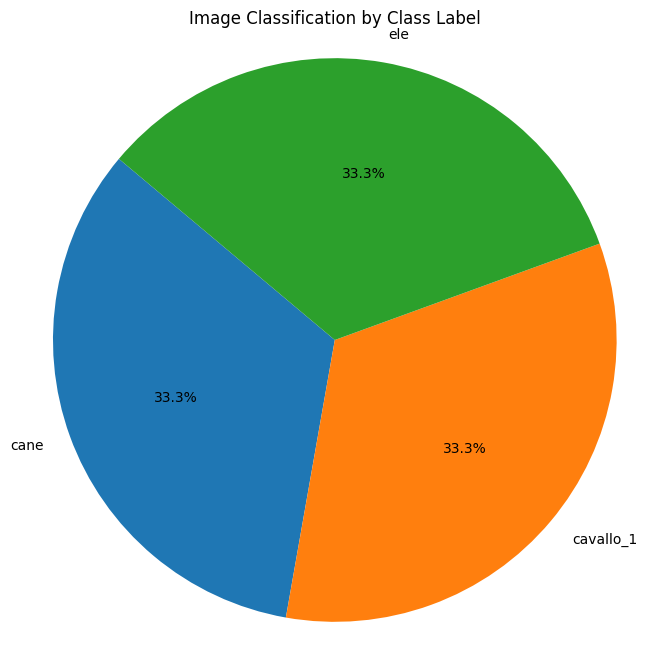

In [ ]:
class_counts = dict(zip(class_names, class_sizes))


labels = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Image Classification by Class Label')
plt.show()




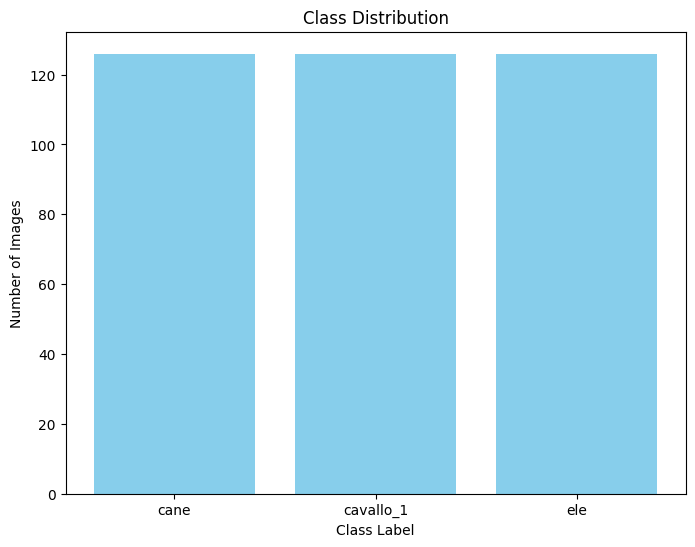

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(class_name_size.keys(), class_name_size.values(), color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

In [ ]:
def preprocess_image(image_path, target_size):
    # Read the image
    image = cv2.imread(image_path)
    # Resize the image to the target size
    image = cv2.resize(image, target_size)
    # Normalize the pixel values to be between 0 and 1
    image = image / 255.0
    return image

In [ ]:
labels_dict = {label: count for label, count in zip(labels, counts)}


print("Labels Dictionary:", labels_dict)

Labels Dictionary: {'cane': 126, 'cavallo_1': 126, 'ele': 126}


In [ ]:
X = []
Y = []

for cls in labels_dict:
    path = os.path.join(data_path, cls)
    for j in os.listdir(path):
        img = cv2.imread(os.path.join(path, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(labels_dict[cls])

In [ ]:
X = np.array(X)
Y = np.array(Y)


In [ ]:
random_indices = np.random.permutation(len(X))
X = X[random_indices]
Y = Y[random_indices]

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (264, 200, 200) (264,)
Validation set: (57, 200, 200) (57,)
Test set: (57, 200, 200) (57,)


In [ ]:
print(X_train.shape)
print(y_train.shape)

(264, 200, 200)
(264,)


In [ ]:
print(len(X_train))
print(len(y_train))

88
264


In [ ]:
X_train = X_train.reshape(-1, 200, 200, 3)


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),  # Change input_shape to (200, 200, 3)
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Change the number of units in the output layer to match the number of classes
])

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])





In [ ]:

model.fit(X_train, y_train, epochs = 5, batch_size = 64)

ValueError: Data cardinality is ambiguous:
  x sizes: 88
  y sizes: 264
Make sure all arrays contain the same number of samples.

In [ ]:
model.evaluate(X_test, y_test)

idx2 = random.randint(0, len(y_test))
plt.imshow(X_test[idx2, :])
plt.show()

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_4' (type Sequential).
    
    Input 0 of layer "conv2d_8" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 200, 200)
    
    Call arguments received by layer 'sequential_4' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 200, 200), dtype=uint8)
      • training=False
      • mask=None
